In [6]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans as sklearn_KMeans

import matplotlib.pyplot as plt
%matplotlib inline

We will use PCA to reduce iris data dimension from 4 to 2 for better visualization.


In [2]:
class PCA:
    
    def __init__(self):
        self.reduction_mat = None
    
    def fit(self, data, num_components):
        data = np.array(data)
        data = data - data.mean(axis=0)
        
        eig_vecs = np.linalg.svd(np.cov(data, rowvar=False))[0]
        self.reduction_mat = eig_vecs[:, :num_components]
        
    def transform(self, x):
        transformed_x = [np.matmul(self.reduction_mat.T, _x) for _x in x]
        return np.array(transformed_x)


In [3]:
class KMeans:
    
    def __init__(self):
        self.labels = None
        
    def clusterize(self, x, num_clusters):
        x = np.array(x)
        
        num_samples = len(x)
        num_feats = len(x[0])
        
        init_ids = np.random.randint(0, num_samples, num_clusters)
        means = np.array([x[init_id] for init_id in init_ids])
        labels = np.zeros(num_samples, dtype=np.int32)
        
        while True:
            for i, _x in enumerate(x):
                dists = [np.linalg.norm(_x - mean)**2 for mean in means]
                dists = np.array(dists)
                labels[i] = dists.argmin()
            
            new_means = [x[labels == i].mean(axis=0) for i in range(num_clusters)]
            new_means = np.array(new_means)
            check = [(new_means[i] == means[i]).all() for i in range(num_clusters)]
            check = np.array(check)
            
            if check.all():
                self.labels = labels
                break
                
            means = new_means  

In [7]:
data = datasets.load_iris()
data, labels = data.data, data.target

pc = PCA()
pc.fit(data, 2)
data = pc.transform(data)

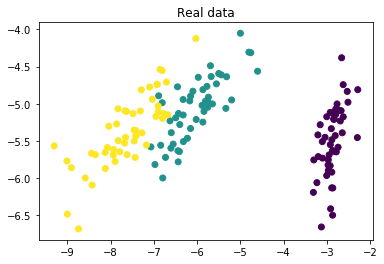

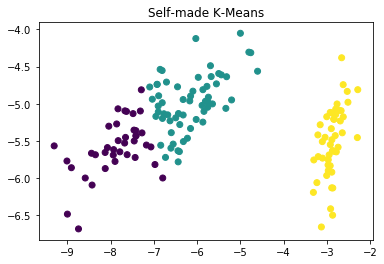

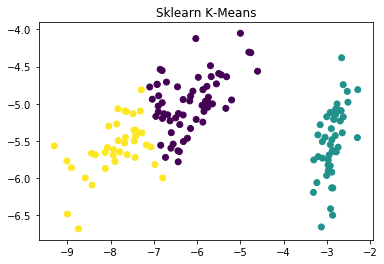

In [12]:
plt.figure(1)
plt.title('Real data')
plt.scatter(data[:, 0], data[:, 1], c=labels)

plt.figure(2)
km = KMeans()
km.clusterize(data, 3)
plt.title('Self-made K-Means')
plt.scatter(data[:, 0], data[:, 1], c=km.labels)

plt.figure(3)
sklearn_km = sklearn_KMeans(n_clusters=3)
sklearn_km.fit(data)
plt.title('Sklearn K-Means')
plt.scatter(data[:, 0], data[:, 1], c=sklearn_km.labels_)
